In [1]:
from __future__ import absolute_import, division, print_function, unicode_literals

# Install TensorFlow
try:
  # %tensorflow_version only exists in Colab.
  %tensorflow_version 2.x
except Exception:
  pass

import tensorflow as tf

TensorFlow 2.x selected.


In [2]:
print(tf.__version__) #version check

2.0.0


# 1. Train your first model

In [3]:
mnist = tf.keras.datasets.mnist # mnist = dataset 이름 0~9까지 필기체
# dir 써서 데이터셋이 뭐있나 볼수있음

(x_train, y_train), (x_test, y_test) = mnist.load_data() # data load
x_train, x_test = x_train / 255.0, x_test / 255.0 # data preprocessing 0~! 사이의 값으로

11493376/11490434 [==============================] - 0s 0us/step


In [4]:
print(x_train.shape, y_train.shape) #check your data shape 28X28 크기 60000개라는 뜻

(60000, 28, 28) (60000,)


In [0]:
#keras in tensorflow gives easy ways to build model
model = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(input_shape=(28, 28)), # 영상을 쭉 펴준다
  tf.keras.layers.Dense(128, activation='relu'), # 이 레이어의 펄셉트론 개수 약간 히든 레이어 같음
  tf.keras.layers.Dropout(0.2), # regularization
  tf.keras.layers.Dense(10, activation='softmax')
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [6]:
model.summary() #After building your model, you can see summarization of the architecture

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 128)               100480    
_________________________________________________________________
dropout (Dropout)            (None, 128)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 10)                1290      
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________


In [7]:
model.fit(x_train, y_train, epochs=5)

model.evaluate(x_test,  y_test, verbose=2)

Train on 60000 samples
Epoch 1/5
60000/60000 [==============================] - 7s 121us/sample - loss: 0.2917 - accuracy: 0.9159
Epoch 2/5
60000/60000 [==============================] - 6s 94us/sample - loss: 0.1414 - accuracy: 0.9582
Epoch 3/5
60000/60000 [==============================] - 6s 95us/sample - loss: 0.1086 - accuracy: 0.9672
Epoch 4/5
60000/60000 [==============================] - 6s 94us/sample - loss: 0.0874 - accuracy: 0.9732
Epoch 5/5
60000/60000 [==============================] - 6s 95us/sample - loss: 0.0741 - accuracy: 0.9766
10000/1 - 1s - loss: 0.0371 - accuracy: 0.9790


[0.07190328757185489, 0.979]

# 2. Move to Convolutional Neural Network!

In [0]:
your_cnn = tf.keras.models.Sequential()
your_cnn.add(tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))
your_cnn.add(tf.keras.layers.MaxPooling2D((2, 2)))
your_cnn.add(tf.keras.layers.Conv2D(64, (3, 3), activation='relu'))

your_cnn.add(tf.keras.layers.Flatten())
your_cnn.add(tf.keras.layers.Dense(64, activation='relu'))
your_cnn.add(tf.keras.layers.Dense(10, activation='softmax'))

In [9]:
your_cnn.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 11, 11, 64)        18496     
_________________________________________________________________
flatten_1 (Flatten)          (None, 7744)              0         
_________________________________________________________________
dense_2 (Dense)              (None, 64)                495680    
_________________________________________________________________
dense_3 (Dense)              (None, 10)                650       
Total params: 515,146
Trainable params: 515,146
Non-trainable params: 0
________________________________________________

In [0]:
your_cnn.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [11]:
your_cnn.fit(x_train, y_train, epochs=5) # It gives you error! why? You have data-shape problem!

your_cnn.evaluate(x_test,  y_test, verbose=2)

ValueError: ignored

In [0]:
# Image shape must be (N, W, H, C) when you fetch this image into Convolutional layer. 
# It's a promise with TensorFlow!

x_train = tf.expand_dims(x_train, axis = 3)
x_test = tf.expand_dims(x_test, axis=3)

In [13]:
print(x_train.shape, y_train.shape) #check your data shape

(60000, 28, 28, 1) (60000,)


In [14]:
your_cnn.fit(x_train, y_train, epochs=5) # It gives you error! why? You have data-shape problem!

your_cnn.evaluate(x_test,  y_test, verbose=2)

Train on 60000 samples
Epoch 1/5
60000/60000 [==============================] - 13s 220us/sample - loss: 0.1182 - accuracy: 0.9643
Epoch 2/5
60000/60000 [==============================] - 10s 171us/sample - loss: 0.0373 - accuracy: 0.9886
Epoch 3/5
60000/60000 [==============================] - 10s 172us/sample - loss: 0.0257 - accuracy: 0.9920
Epoch 4/5
60000/60000 [==============================] - 10s 173us/sample - loss: 0.0175 - accuracy: 0.9943
Epoch 5/5
60000/60000 [==============================] - 10s 172us/sample - loss: 0.0140 - accuracy: 0.9955
10000/1 - 1s - loss: 0.0183 - accuracy: 0.9897


[0.03659462328004865, 0.9897]

# you can see model parameters from layers

In [15]:
print(your_cnn.layers)

[<tensorflow.python.keras.layers.convolutional.Conv2D object at 0x7fc6c0bef6a0>, <tensorflow.python.keras.layers.pooling.MaxPooling2D object at 0x7fc6c0bef780>, <tensorflow.python.keras.layers.convolutional.Conv2D object at 0x7fc6c0bef710>, <tensorflow.python.keras.layers.core.Flatten object at 0x7fc6c0befe80>, <tensorflow.python.keras.layers.core.Dense object at 0x7fc6c0382828>, <tensorflow.python.keras.layers.core.Dense object at 0x7fc6c0382a58>]


In [0]:
first_layer = your_cnn.layers[0]

In [17]:
print(first_layer)

In [18]:
print(first_layer.get_weights()[0].shape)
print(first_layer.get_weights()[1].shape)

(3, 3, 1, 32)
(32,)


In [19]:
first_layer.get_weights()[0][:,:,0,0].shape

(3, 3)

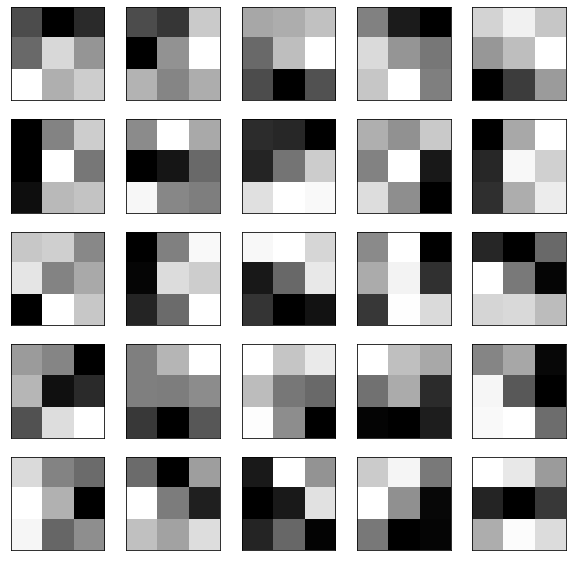

In [20]:
from matplotlib import pyplot as plt

plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(first_layer.get_weights()[0][:,:,0,i], cmap='gray')
    # The CIFAR labels happen to be arrays, 
    # which is why you need the extra index
plt.show()